## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import module.module_analyze_viz as module_analyze_viz
from sklearn.preprocessing import LabelEncoder

### Load Preprocessed Dataset 

In [2]:
df = pd.read_csv('data/booking_after_preprocess.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36280 non-null  object 
 1   number_of_adults          36280 non-null  int64  
 2   number_of_children        36280 non-null  int64  
 3   number_of_weekend_nights  36280 non-null  int64  
 4   number_of_week_nights     36280 non-null  int64  
 5   type_of_meal              36280 non-null  object 
 6   car_parking_space         36280 non-null  int64  
 7   room_type                 36280 non-null  object 
 8   lead_time                 36280 non-null  int64  
 9   market_segment_type       36280 non-null  object 
 10  repeated                  36280 non-null  int64  
 11  P_C                       36280 non-null  int64  
 12  P_not_C                   36280 non-null  int64  
 13  average_price             36280 non-null  float64
 14  specia

### Change data types

In [4]:
df = module_analyze_viz.df_turn_datatype_to_categorical(df,['type_of_meal', 'room_type', 'market_segment_type', 'booking_status' ])

In [5]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='%Y-%m-%d') 
df['date_of_arrival'] = pd.to_datetime(df['date_of_arrival'], format='%Y-%m-%d') 

### Data statistics

In [6]:
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P_C,P_not_C,average_price,...,reservation_day,reservation_month,reservation_year,date_of_arrival,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
count,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,...,36280.000000,36280.000000,36280.000000,36280,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000
mean,1.844928,0.104520,0.807387,2.192558,0.030981,85.204631,0.025634,0.014333,0.116262,103.304300,...,15.592475,7.423319,2017.820397,2018-08-17 18:50:38.765159936,15.851847,6.812789,2018.103721,2.427012,2.999945,1.949449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2017.000000,2017-07-07 00:00:00,1.000000,1.000000,2017.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,8.000000,5.000000,2018.000000,2018-04-06 00:00:00,8.000000,3.000000,2018.000000,0.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,16.000000,8.000000,2018.000000,2018-08-26 00:00:00,16.000000,7.000000,2018.000000,1.000000,3.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,23.000000,10.000000,2018.000000,2018-12-25 00:00:00,24.000000,10.000000,2018.000000,4.000000,4.000000,2.000000
max,4.000000,3.000000,5.000000,11.000000,1.000000,443.000000,1.000000,6.000000,30.000000,266.670000,...,31.000000,12.000000,2018.000000,2019-12-16 00:00:00,31.000000,12.000000,2019.000000,14.000000,16.000000,5.000000
std,0.518719,0.393715,0.861570,1.360295,0.173269,85.889460,0.158043,0.184321,1.159722,34.627003,...,8.734425,3.069824,0.383862,NaN,8.834761,3.637653,0.593354,2.821933,1.709279,0.645135


## Data distribution
Histograms, Pie charts, box plots

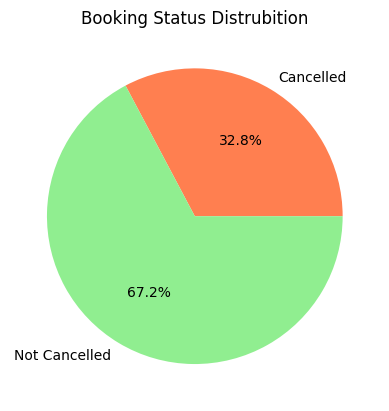

<Figure size 1200x800 with 0 Axes>

In [7]:
plt.pie(
        x=[
        df[df['booking_status'] == 'Canceled']['booking_status'].count(),
        df[df['booking_status'] == 'Not_Canceled']['booking_status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()
    

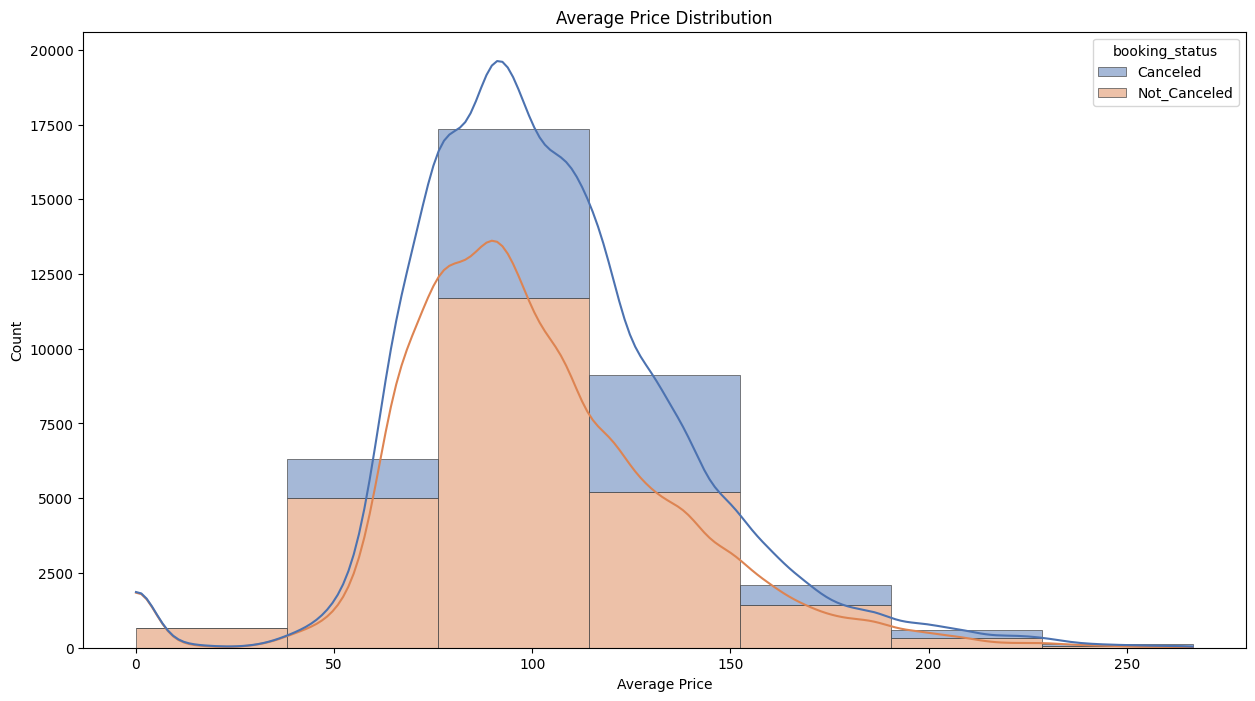

In [8]:
module_analyze_viz.plot_hist(df,'Average Price Distribution', 'Average Price', 'average_price', 7, True, 'booking_status')

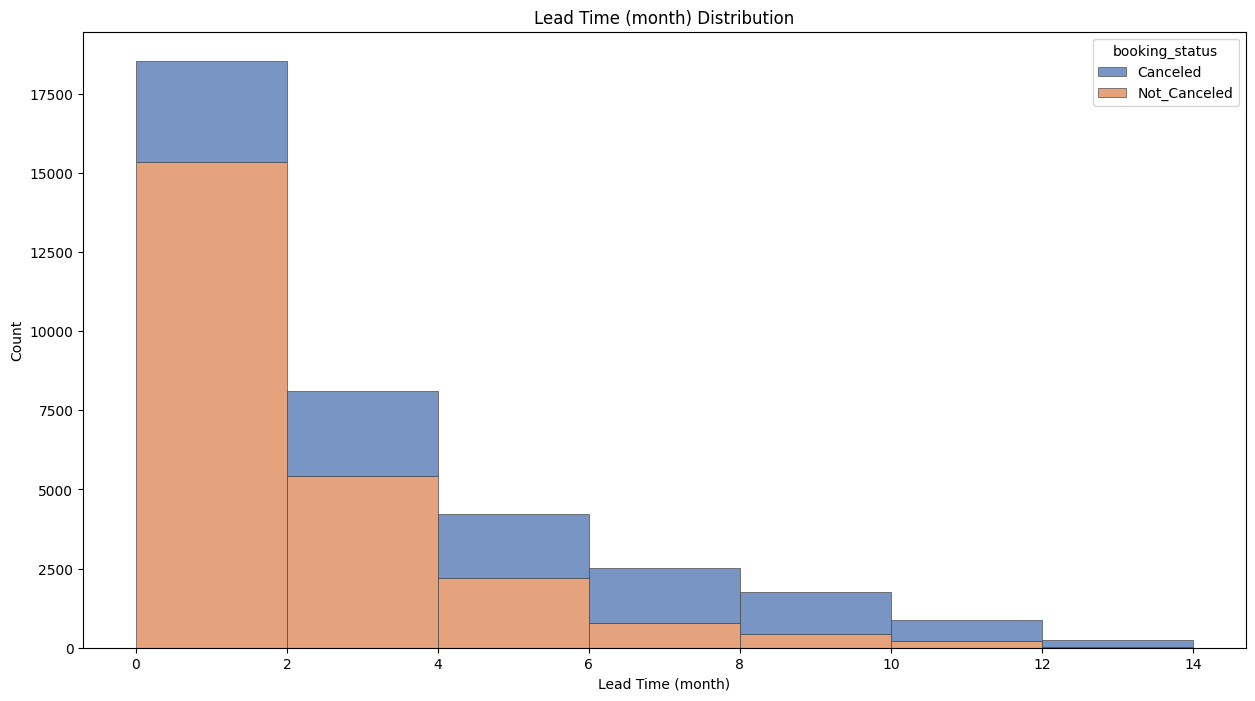

In [9]:
module_analyze_viz.plot_hist(df,'Lead Time (month) Distribution', 'Lead Time (month)', 'lead_month', 7, False, 'booking_status' )

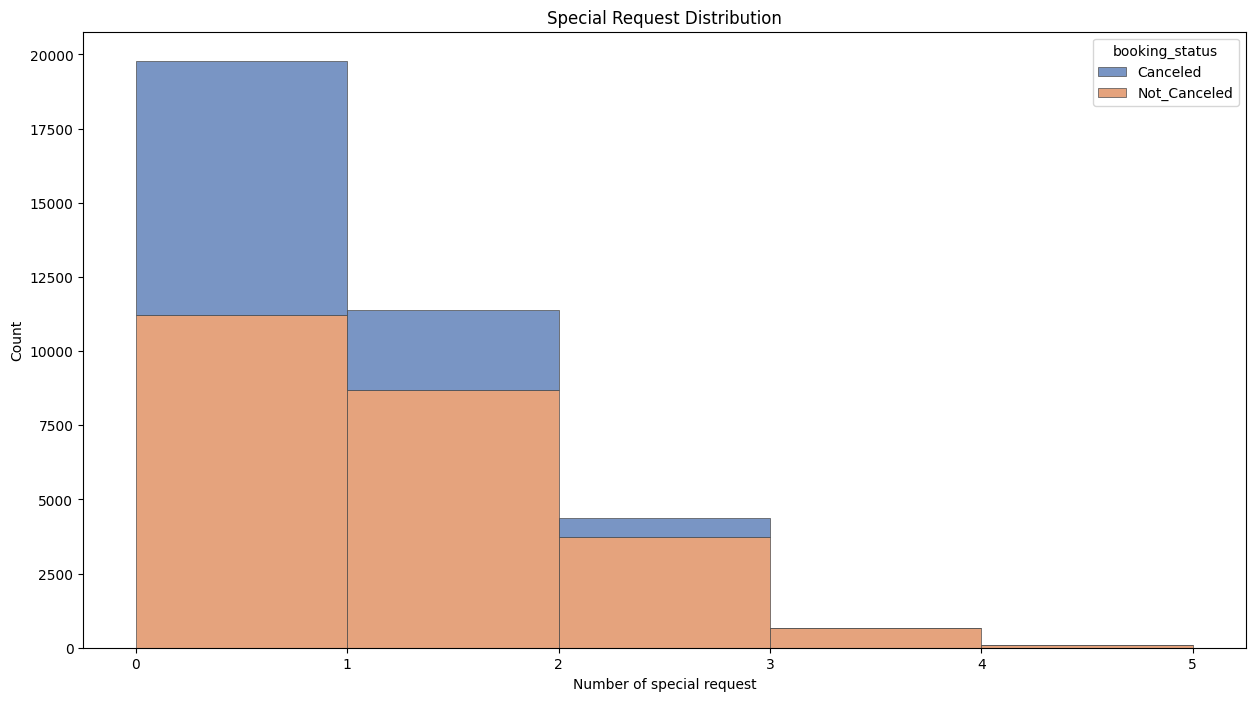

In [10]:
module_analyze_viz.plot_hist(df,'Special Request Distribution', 'Number of special request', 'special_requests', 5, False, 'booking_status' )

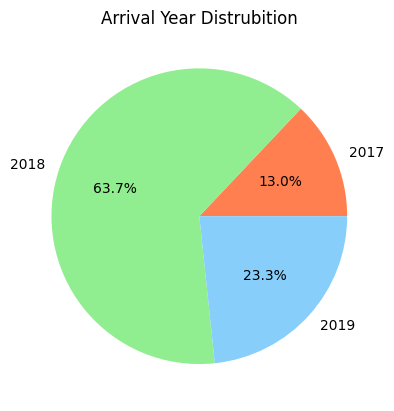

<Figure size 1200x800 with 0 Axes>

In [11]:
plt.pie(
        x=[
        df.query('arrival_year == 2017')['arrival_year'].count(),
        df.query('arrival_year == 2018')['arrival_year'].count(),
        df.query('arrival_year == 2019')['arrival_year'].count(),
        ],
        labels=['2017', '2018','2019'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen', 'lightskyblue'],
)
plt.title('Arrival Year Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

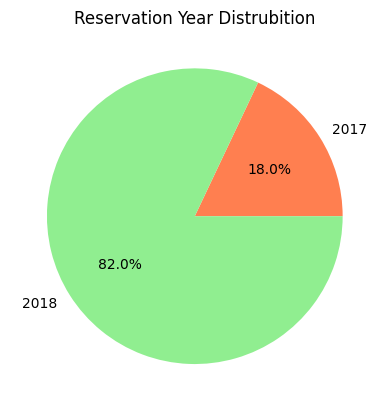

<Figure size 1200x800 with 0 Axes>

In [12]:
plt.pie(
        x=[
        df.query('reservation_year == 2017')['reservation_year'].count(),
        df.query('reservation_year == 2018')['reservation_year'].count(),
        ],
        labels=['2017', '2018'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Reservation Year Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

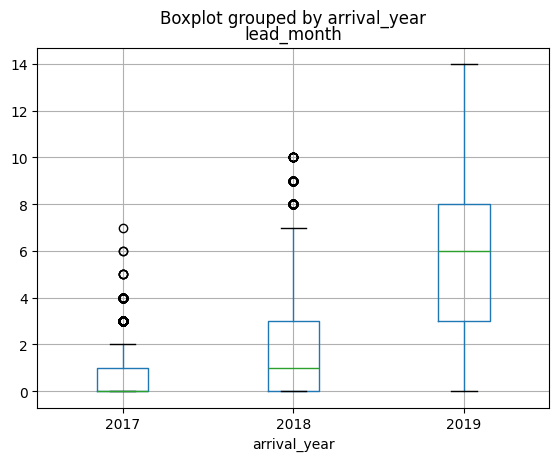

In [13]:
df.boxplot(column='lead_month', by='arrival_year')
plt.show()

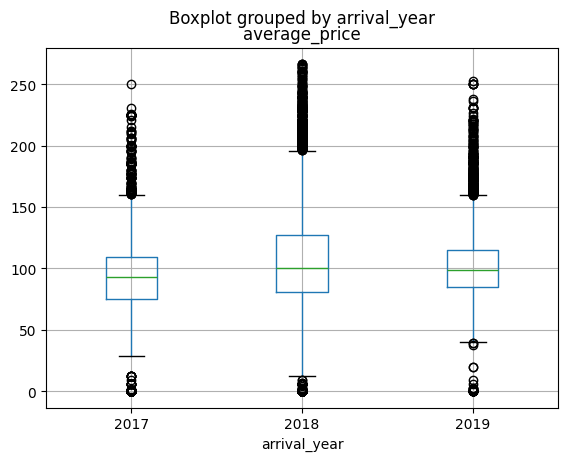

In [14]:
df.boxplot(column='average_price', by='arrival_year')
plt.show()

In [15]:
df.query('arrival_year==2019').groupby('booking_status',observed=True)['booking_status'].count()

booking_status
Canceled        5092
Not_Canceled    3371
Name: booking_status, dtype: int64

In [16]:
df.query('arrival_year==2018').groupby('booking_status',observed=True)['booking_status'].count()

booking_status
Canceled         6310
Not_Canceled    16807
Name: booking_status, dtype: int64

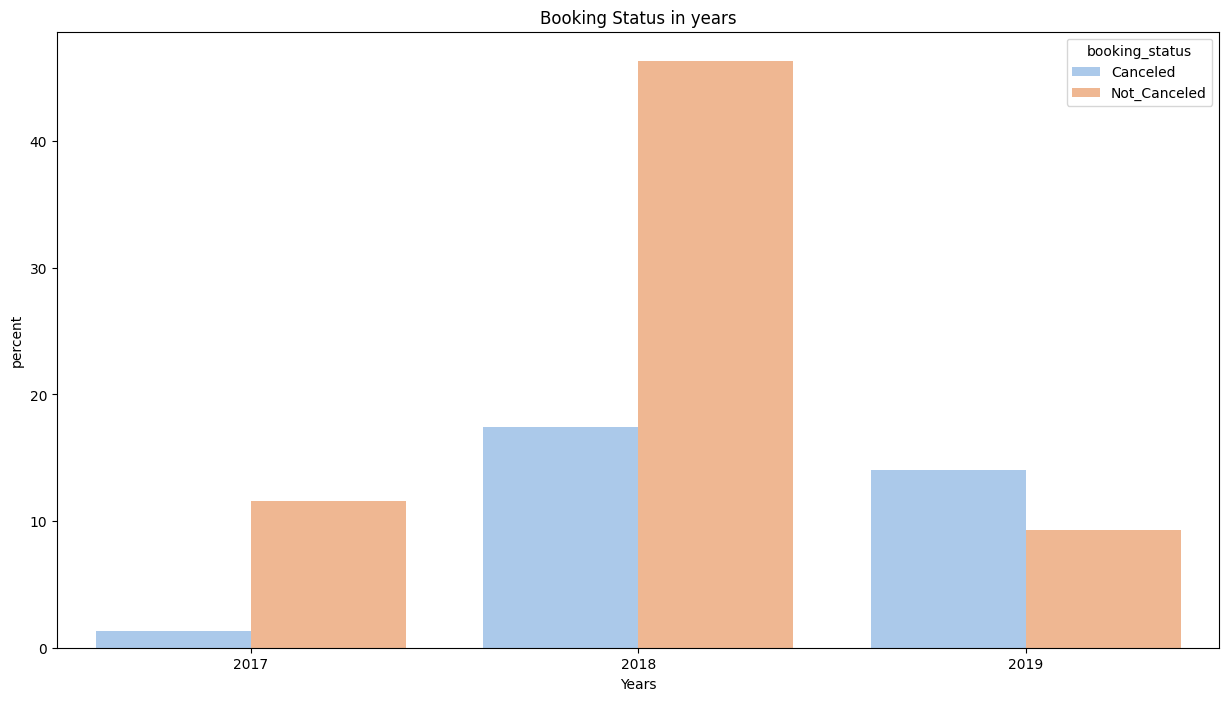

In [17]:
module_analyze_viz.plot_count(df['arrival_year'],title ='Booking Status in years', xlabel='Years', hue=df['booking_status'],palette='pastel')

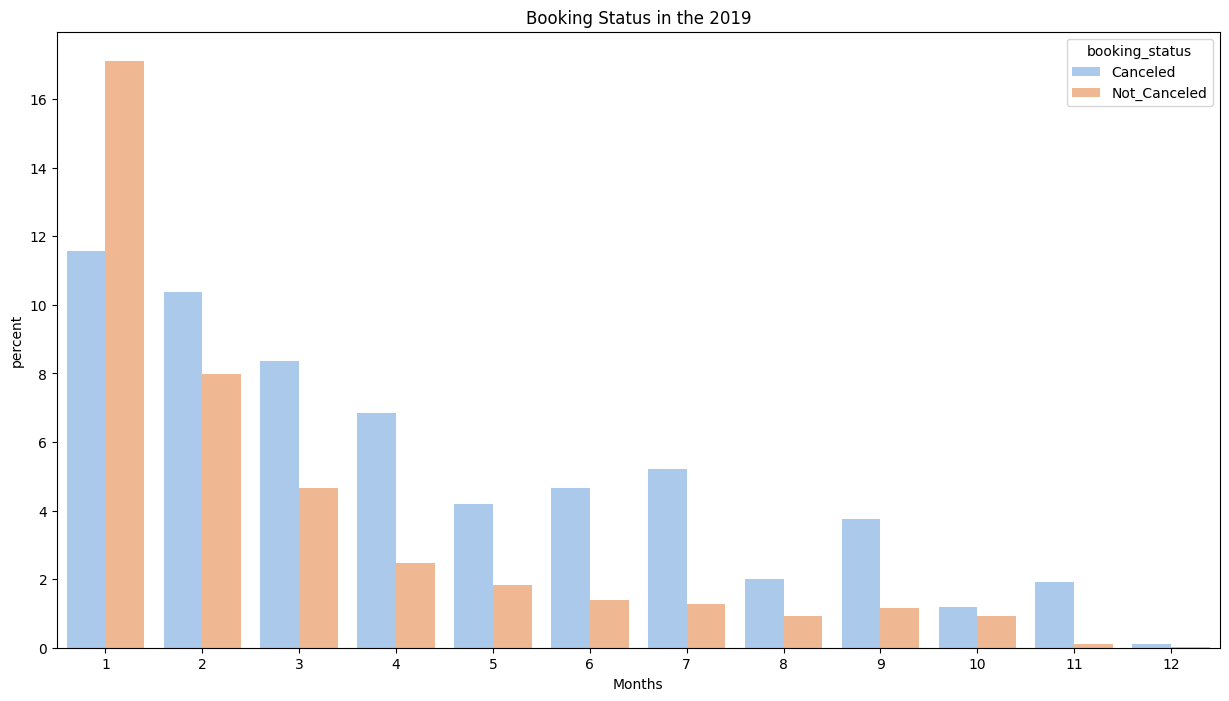

In [18]:
module_analyze_viz.plot_count(df.query('arrival_year == 2019')['arrival_month'],title ='Booking Status in the 2019', xlabel='Months', hue=df.query('arrival_year == 2019')['booking_status'],palette='pastel')

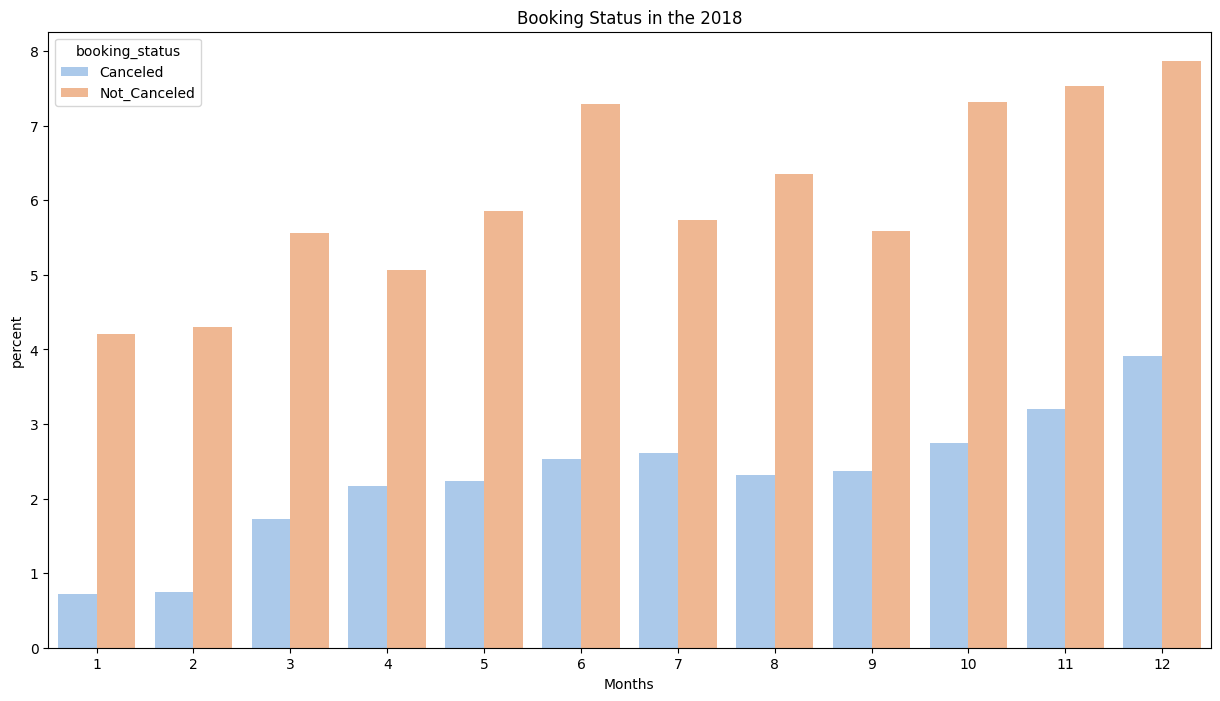

In [19]:
module_analyze_viz.plot_count(df.query('arrival_year == 2018')['arrival_month'],title ='Booking Status in the 2018', xlabel='Months', hue=df.query('arrival_year == 2018')['booking_status'],palette='pastel')

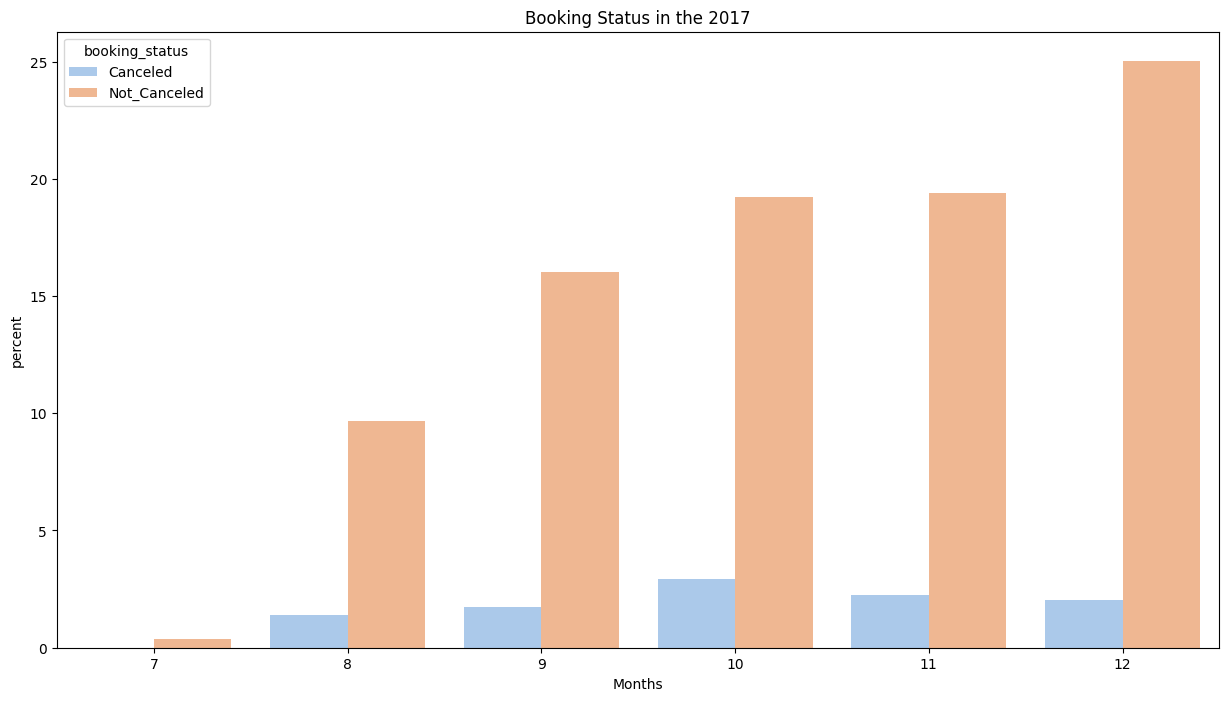

In [20]:
module_analyze_viz.plot_count(df.query('arrival_year == 2017')['arrival_month'],title ='Booking Status in the 2017', xlabel='Months', hue=df.query('arrival_year == 2017')['booking_status'],palette='pastel')

## Change overtime
Line plots

In [21]:
df['arrival_year'] = df['arrival_year'].astype(str)
df['reservation_year'] = df['reservation_year'].astype(str)



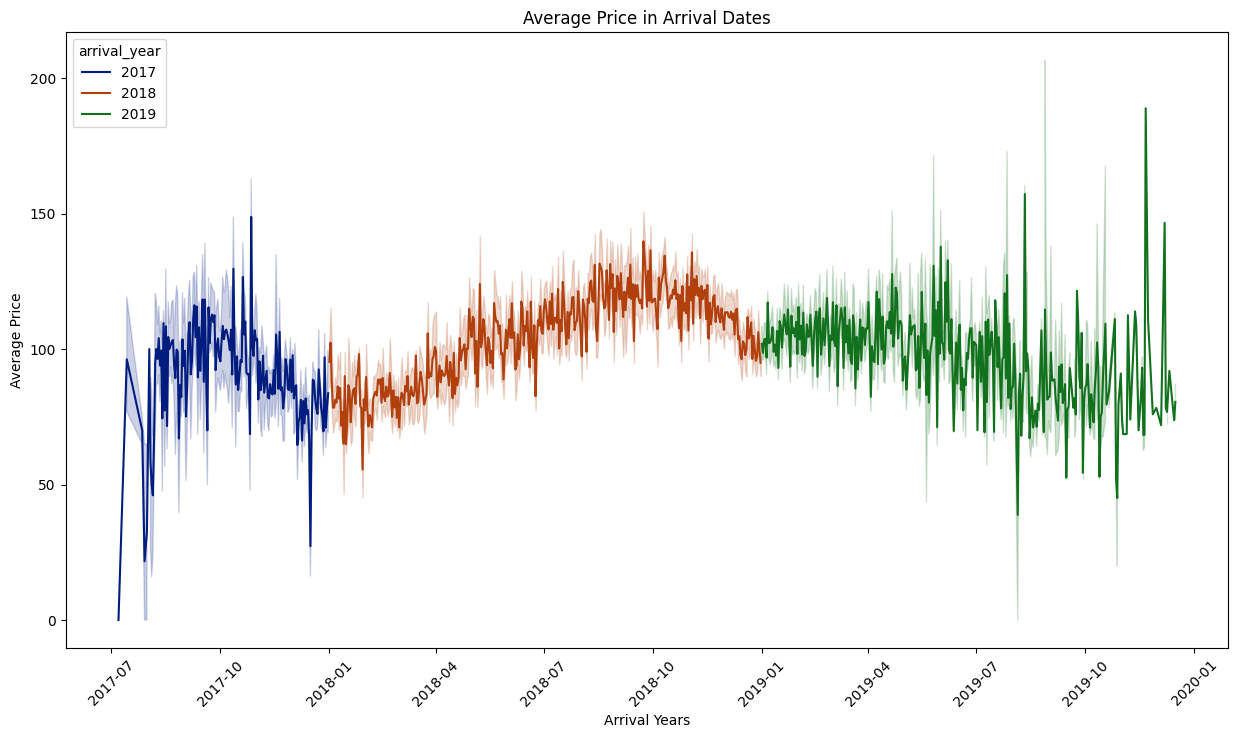

In [22]:
plt.figure(figsize=(15,8))
plt.title('Average Price in Arrival Dates')
plt.ylabel('Average Price')
plt.xlabel('Arrival Years')
plt.xticks(rotation=45)
sns.lineplot(data=df, x="date_of_arrival", y="average_price",
             hue='arrival_year',palette='dark',
             hue_order=['2017','2018','2019'] 
)
plt.show()

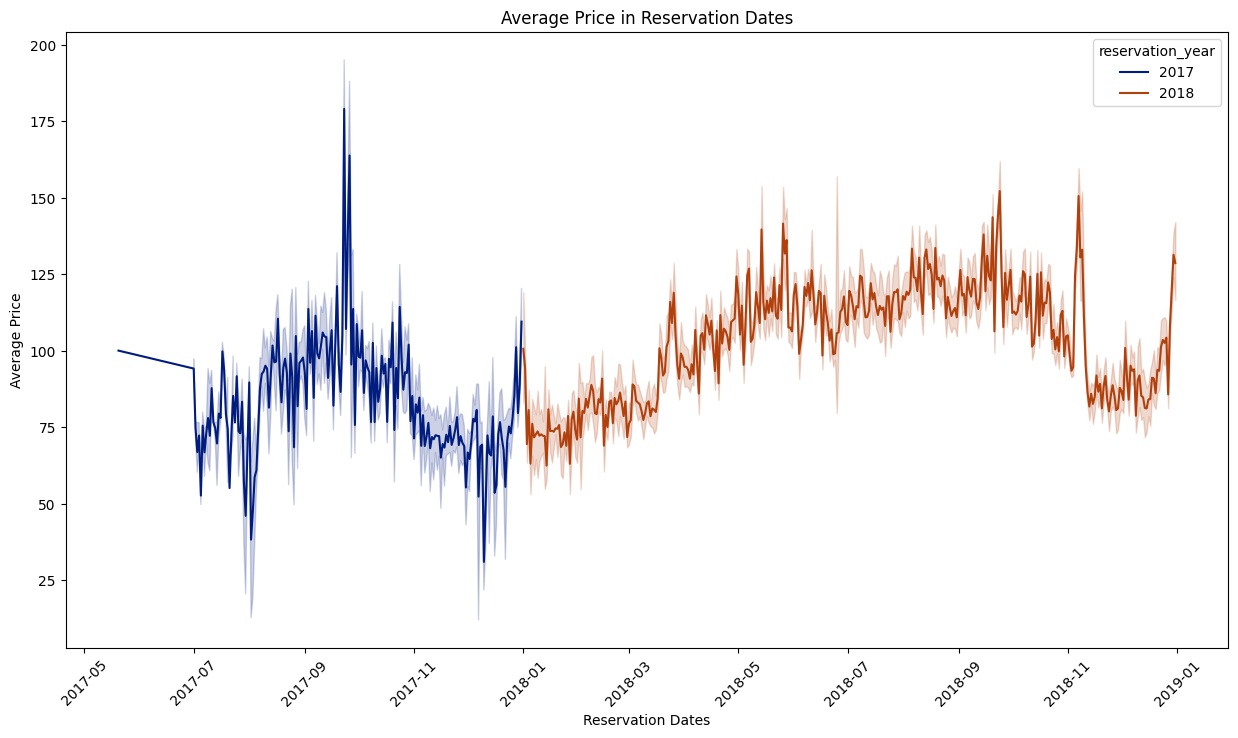

In [23]:
plt.figure(figsize=(15,8))
plt.title('Average Price in Reservation Dates')
plt.ylabel('Average Price')
plt.xlabel('Reservation Dates')
plt.xticks(rotation=45)
sns.lineplot(data=df, x="date_of_reservation", y="average_price",
             hue='reservation_year',palette='dark',
             hue_order=['2017','2018'] 
)
plt.show()

<Axes: xlabel='date_of_arrival', ylabel='lead_time'>

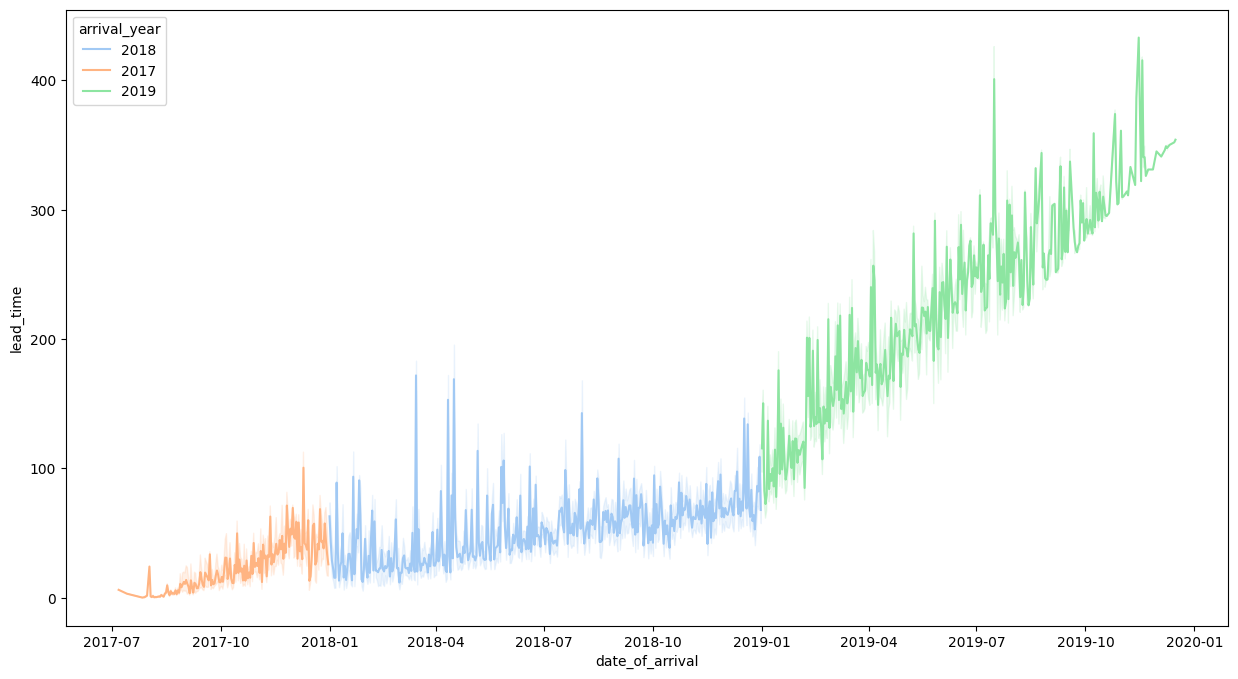

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="date_of_arrival", y="lead_time",hue='arrival_year',palette='pastel')

### Encode Categorical Variables
- booking status
- type of meal
- room type
- market_segment_type 

In [25]:
df['booking_status'].unique()


['Not_Canceled', 'Canceled']
Categories (2, object): ['Canceled', 'Not_Canceled']

In [26]:
le = LabelEncoder()
train = ['Canceled', 'Not_Canceled']
df['booking_status'] = le.fit(train).transform(df['booking_status'])

In [27]:
def encode_categorical_variable(categorical_data):
    le = LabelEncoder()
    train = categorical_data.unique()
    return le.fit(train).transform(categorical_data)


In [28]:
df['room_type'] = encode_categorical_variable(df['room_type'])
df['market_segment_type'] = encode_categorical_variable(df['market_segment_type'])
df['type_of_meal'] = encode_categorical_variable(df['type_of_meal'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36280 non-null  object        
 1   number_of_adults          36280 non-null  int64         
 2   number_of_children        36280 non-null  int64         
 3   number_of_weekend_nights  36280 non-null  int64         
 4   number_of_week_nights     36280 non-null  int64         
 5   type_of_meal              36280 non-null  int32         
 6   car_parking_space         36280 non-null  int64         
 7   room_type                 36280 non-null  int32         
 8   lead_time                 36280 non-null  int64         
 9   market_segment_type       36280 non-null  int32         
 10  repeated                  36280 non-null  int64         
 11  P_C                       36280 non-null  int64         
 12  P_not_C           

In [30]:
#Saving csv file after encoding labels
df.to_csv("booking_after_encoding.csv",index=False)

### Relationship between variables
Correlation heatmap

### CORELATION

In [31]:
# Changing month to numerical for corelation
df['arrival_month'] = df['date_of_arrival'].dt.month
df['reservation_month'] = df['date_of_reservation'].dt.month


In [32]:
matrix = df.drop(['Booking_ID','date_of_reservation','date_of_arrival'], axis=1).corr() 
matrix['booking_status']     


number_of_adults           -0.086956
number_of_children         -0.033678
number_of_weekend_nights   -0.058227
number_of_week_nights      -0.087879
type_of_meal               -0.026806
car_parking_space           0.086165
room_type                  -0.022893
lead_time                  -0.438333
market_segment_type        -0.135964
repeated                    0.107267
P_C                         0.049816
P_not_C                     0.068658
average_price              -0.142137
special_requests            0.253170
booking_status              1.000000
reservation_day            -0.010701
reservation_month           0.011634
reservation_year           -0.179401
arrival_day                -0.004080
arrival_month               0.096191
arrival_year               -0.334180
lead_month                 -0.436880
number_of_total_nights     -0.099286
number_of_total_people     -0.090470
Name: booking_status, dtype: float64

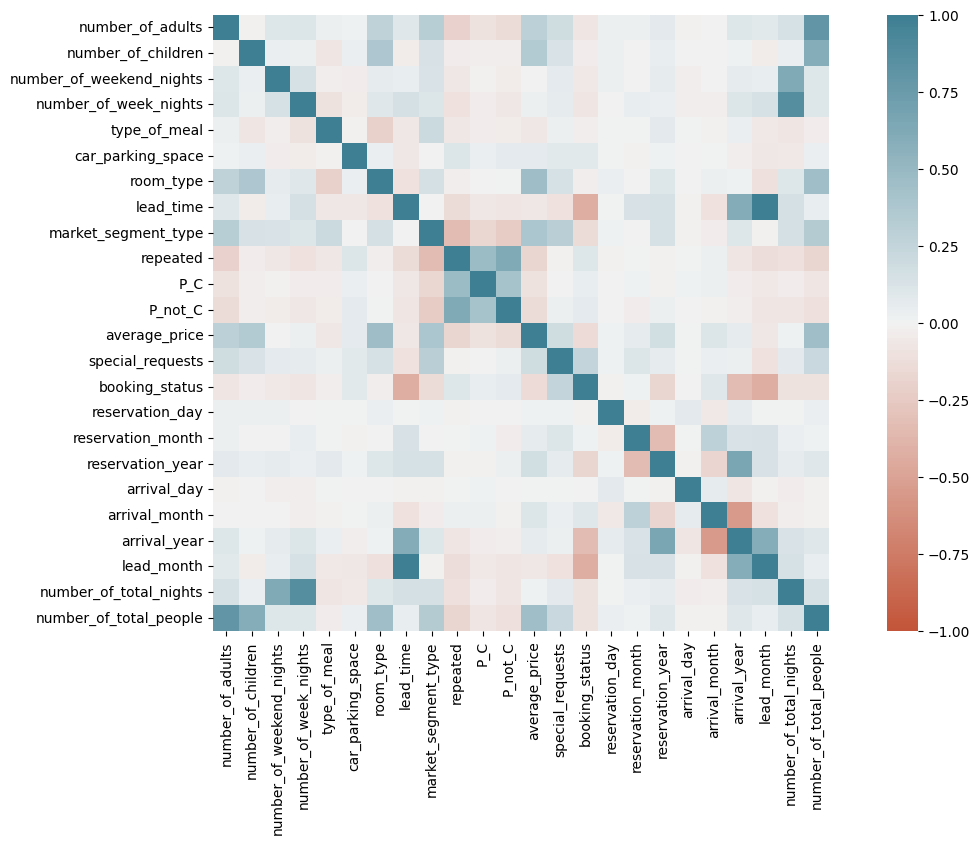

In [33]:
module_analyze_viz.corr_heatmap(df.drop(['Booking_ID','date_of_reservation','date_of_arrival'], axis=1))

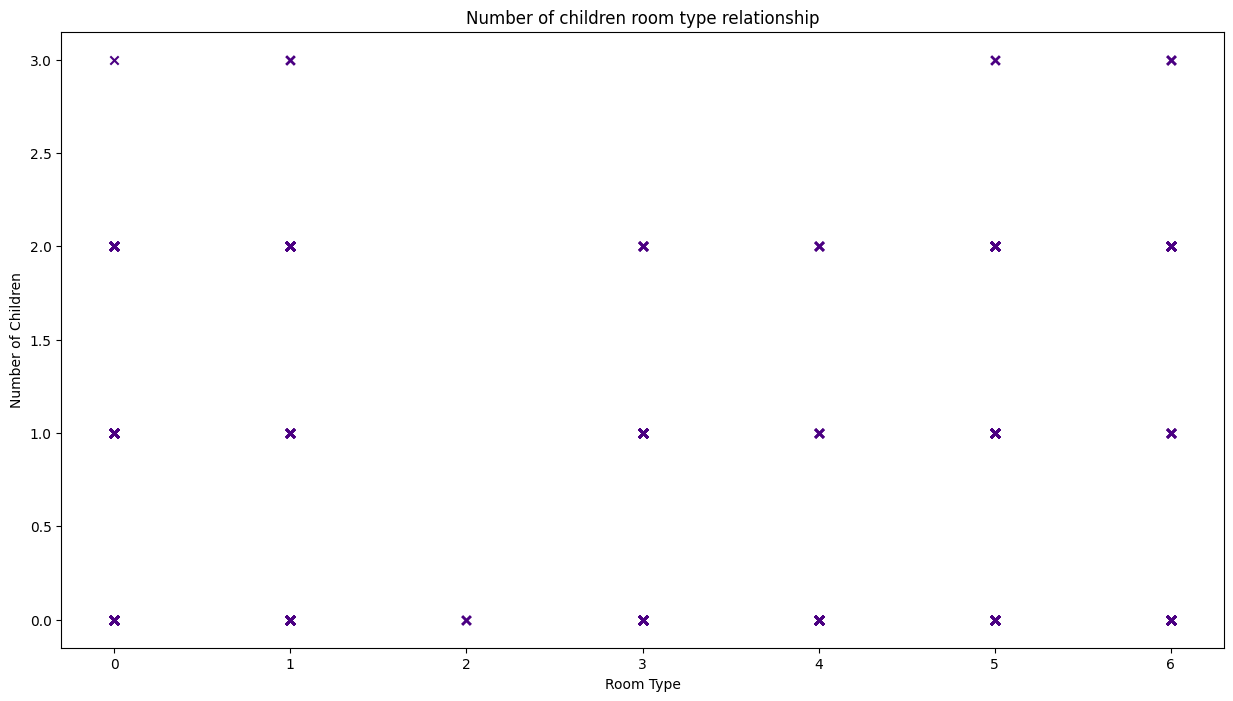

In [34]:
module_analyze_viz.plot_scatter(df['room_type'],df['number_of_children'],'Number of children room type relationship','Room Type', 'Number of Children',color='indigo')